In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import nsepy as ns
from datetime import date

In [2]:
infy = ns.get_history(symbol='INFY',start=date(2015,4,1), end=date(2016,3,31))    #.to_pickle('./infy.pkl')
tcs = ns.get_history(symbol='TCS',start=date(2015,4,1), end=date(2016,3,31))      #.to_pickle('./tcs.pkl')

In [3]:
display(infy.head())
display(tcs.head())

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-04-01,TCS,EQ,2553.95,2558.00,2563.60,2522.25,2544.05,2542.65,2538.81,1037879,2.634981e+14,54078,784911,0.7563
2015-04-06,TCS,EQ,2542.65,2558.00,2562.90,2500.10,2548.30,2547.30,2531.53,784271,1.985405e+14,45408,485665,0.6193
2015-04-07,TCS,EQ,2547.30,2562.45,2599.00,2544.00,2588.95,2585.00,2571.50,943461,2.426111e+14,77106,562689,0.5964
2015-04-08,TCS,EQ,2585.00,2594.00,2656.50,2590.85,2646.00,2641.40,2632.00,826067,2.174208e+14,61358,496296,0.6008
2015-04-09,TCS,EQ,2641.40,2659.00,2687.45,2635.15,2662.60,2664.55,2658.35,1272225,3.382018e+14,62583,902143,0.7091


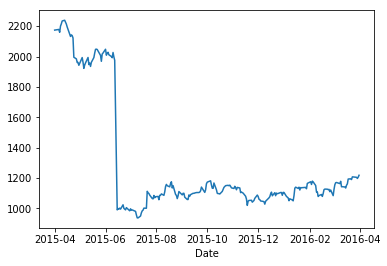

In [4]:
infy['Close'].plot()

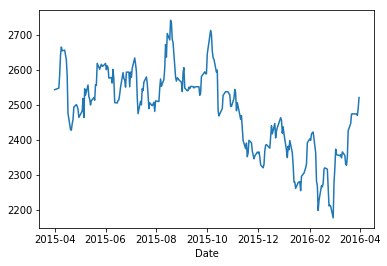

In [5]:
tcs['Close'].plot()

#### Plotting moving average 

In [6]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(15,6))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

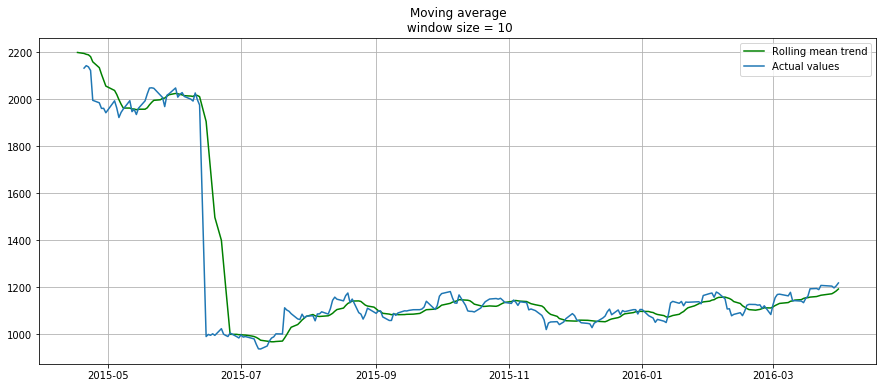

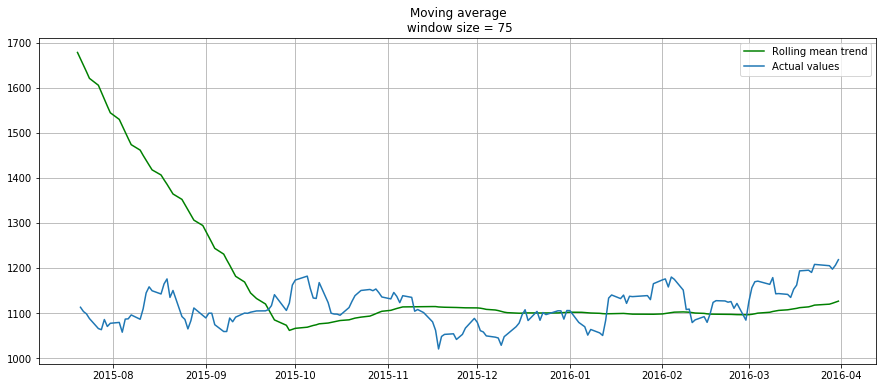

In [7]:
plot_moving_average(infy['Close'],10) 
plot_moving_average(infy['Close'],75)

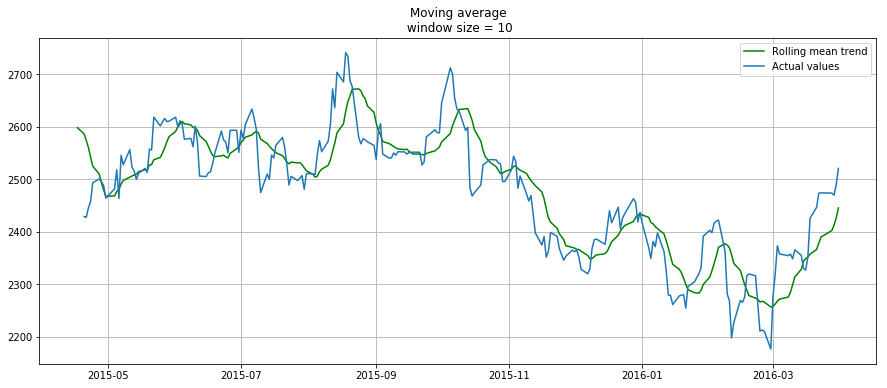

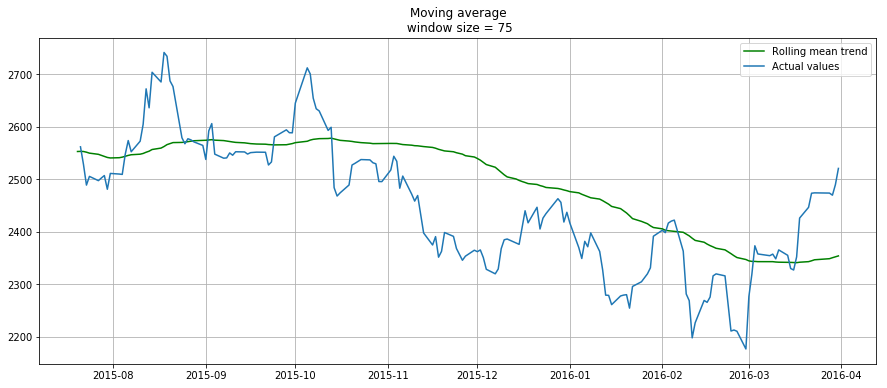

In [8]:
plot_moving_average(tcs['Close'],10)
plot_moving_average(tcs['Close'],75)

#### Creating dummy variables

In [9]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325


In [10]:
infy['Vol_per_incr'] = np.zeros(infy.shape[0])
infy['ClosePr_per_incr'] = np.zeros(infy.shape[0])

In [11]:
for i in range(infy.shape[0]-1):
    infy['Vol_per_incr'].iloc[i+1] = ((infy['Volume'].iloc[i+1] - infy['Volume'].iloc[i])/infy['Volume'].iloc[i]) *100
    infy['ClosePr_per_incr'].iloc[i+1] = ((infy['Close'].iloc[i+1] - infy['Close'].iloc[i])/infy['Close'].iloc[i]) *100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Vol_per_incr,ClosePr_per_incr
Date,,,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051,0.000000,0.000000
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903,14.888563,0.195497
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540,10.340243,-0.858507
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891,19.237373,1.900903
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325,3.887576,0.656654


In [13]:
infy['dummy_Vol_incr'] = pd.get_dummies(abs(infy['Vol_per_incr']) > 10, drop_first=True)
infy['dummy_Close_incr'] = pd.get_dummies(abs(infy['ClosePr_per_incr']) > 2,drop_first=True)
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Vol_per_incr,ClosePr_per_incr,dummy_Vol_incr,dummy_Close_incr
Date,,,,,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051,0.000000,0.000000,0,0
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903,14.888563,0.195497,1,0
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540,10.340243,-0.858507,1,0
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891,19.237373,1.900903,1,0
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325,3.887576,0.656654,0,0


In [14]:
tcs['Vol_per_incr'] = np.zeros(tcs.shape[0])
tcs['ClosePr_per_incr'] = np.zeros(tcs.shape[0])

for i in range(tcs.shape[0]-1):
    tcs['Vol_per_incr'].iloc[i+1] = ((tcs['Volume'].iloc[i+1] - tcs['Volume'].iloc[i])/tcs['Volume'].iloc[i]) *100
    tcs['ClosePr_per_incr'].iloc[i+1] = ((tcs['Close'].iloc[i+1] - tcs['Close'].iloc[i])/tcs['Close'].iloc[i]) *100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
tcs['dummy_Vol_incr'] = pd.get_dummies(abs(tcs['Vol_per_incr']) > 10, drop_first=True)
tcs['dummy_Close_incr'] = pd.get_dummies(abs(tcs['ClosePr_per_incr']) > 2,drop_first=True)
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Vol_per_incr,ClosePr_per_incr,dummy_Vol_incr,dummy_Close_incr
Date,,,,,,,,,,,,,,,,,,
2015-04-01,TCS,EQ,2553.95,2558.00,2563.60,2522.25,2544.05,2542.65,2538.81,1037879,2.634981e+14,54078,784911,0.7563,0.000000,0.000000,0,0
2015-04-06,TCS,EQ,2542.65,2558.00,2562.90,2500.10,2548.30,2547.30,2531.53,784271,1.985405e+14,45408,485665,0.6193,-24.435218,0.182880,1,0
2015-04-07,TCS,EQ,2547.30,2562.45,2599.00,2544.00,2588.95,2585.00,2571.50,943461,2.426111e+14,77106,562689,0.5964,20.297831,1.479998,1,0
2015-04-08,TCS,EQ,2585.00,2594.00,2656.50,2590.85,2646.00,2641.40,2632.00,826067,2.174208e+14,61358,496296,0.6008,-12.442910,2.181818,1,1
2015-04-09,TCS,EQ,2641.40,2659.00,2687.45,2635.15,2662.60,2664.55,2658.35,1272225,3.382018e+14,62583,902143,0.7091,54.009905,0.876429,1,0


In [16]:
#Price without Volume

infy['Pr_without_Vol'] = np.zeros(infy.shape[0])
tcs['Pr_without_Vol'] = np.zeros(tcs.shape[0])

for i in range(infy.shape[0]):
    if infy['dummy_Vol_incr'].iloc[i] == 1 and infy['dummy_Close_incr'].iloc[i] == 0:
        infy['Pr_without_Vol'].iloc[i] = 1
    else:
        infy['Pr_without_Vol'].iloc[i] = 0
        

for i in range(tcs.shape[0]-1):
    if tcs['dummy_Vol_incr'].iloc[i] == 1 and tcs['dummy_Close_incr'].iloc[i] == 0:
        tcs['Pr_without_Vol'].iloc[i] = 1
    else:
        tcs['Pr_without_Vol'].iloc[i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Vol_per_incr,ClosePr_per_incr,dummy_Vol_incr,dummy_Close_incr,Pr_without_Vol
Date,,,,,,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051,0.000000,0.000000,0,0,0.0
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903,14.888563,0.195497,1,0,1.0
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540,10.340243,-0.858507,1,0,1.0
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891,19.237373,1.900903,1,0,1.0
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325,3.887576,0.656654,0,0,0.0


### Plotting figures using Bokeh

In [18]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [19]:
source = ColumnDataSource(infy)
source_tcs = ColumnDataSource(tcs)

p = figure(x_axis_type='datetime', plot_width=800, plot_height=350)
p.line('Date','Close', source=source, line_color='blue')
p.line('Date','Close', source=source_tcs, line_color='red')

output_notebook()
show(p)

Loading BokehJS ...

In [20]:
p=figure(x_axis_label = 'Volume', y_axis_label = 'Date')
p.line('Date','Volume',source=source, line_color='blue')
p.line('Date','Volume', source=source_tcs, line_color='red')

output_notebook()
show(p)

Loading BokehJS ...

Text(0.5,1,'Partial_Autocorrelation Function')

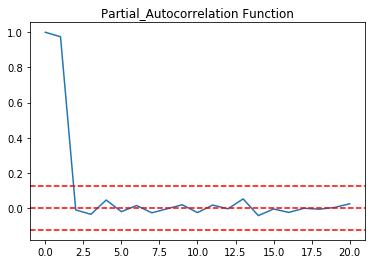

In [21]:
# Plotting auto correlation 

from statsmodels.tsa.stattools import pacf

lag_pacf = pacf(infy['Close'], nlags=20, method='ols')
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(infy['Close'])),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(infy['Close'])),linestyle='--',color='red')
plt.title('Partial_Autocorrelation Function')

Text(0.5,1,'Partial_Autocorrelation Function')

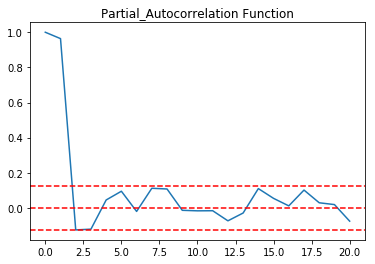

In [22]:
lag_pacf = pacf(tcs['Close'], nlags=20, method='ols')
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(tcs['Close'])),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(tcs['Close'])),linestyle='--',color='red')
plt.title('Partial_Autocorrelation Function')

### Modelling

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error,r2_score 

In [24]:
df_infy = infy.drop(columns=['Symbol','Series','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble',
                            'Vol_per_incr','ClosePr_per_incr','dummy_Vol_incr','dummy_Close_incr'])

df_tcs = tcs.drop(columns=['Symbol','Series','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble',
                            'Vol_per_incr','ClosePr_per_incr','dummy_Vol_incr','dummy_Close_incr'])

In [25]:
df_infy.head()

,Prev Close,Open,High,Low,Last,Close,Volume,Pr_without_Vol
Date,,,,,,,,
2015-04-01,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,1684622,0.0
2015-04-06,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,1935438,1.0
2015-04-07,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2135567,1.0
2015-04-08,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2546394,1.0
2015-04-09,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2645387,0.0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(df_infy.drop(columns=['Close']),df_infy['Close'],test_size= 0.25, shuffle= True)

#### Creating a linear regression model

In [27]:
lr = LinearRegression()

In [28]:
scores = cross_val_score(lr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.99987321 0.99994252 0.99997016 0.99994336 0.9999516 ]
0.9999361706429758
3.301410567985321e-05


In [29]:
predictions = cross_val_predict(lr, X_test, y_test, cv = 5)
r2_score(y_test, predictions)

0.9998754341743311

In [30]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [31]:
print(lr.score(X_test,y_test))
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

0.9998459379734493
27.709042932565644
0.9998459379734493


#### Using RandomForestRegressor from sklearn.ensemble

In [32]:
random_forest = RandomForestRegressor(n_jobs=-1)

In [33]:
scores = cross_val_score(random_forest, X_train, y_train, cv = 5)
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.99928135 0.9996548  0.99960091 0.9988257  0.9995904 ]
0.9993906320582152
0.00031144897643066725


In [34]:
predictions = cross_val_predict(random_forest, X_test, y_test, cv = 5)
r2_score(y_test, predictions)

0.9969637066471845

In [35]:
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)

In [36]:
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

1358.7095298387092
0.9924455873784581
